In [ ]:
import numpy as np
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import re  #Regular expression

In [ ]:
twitter_data = pd.read_csv('/content/twitter_validation.csv', encoding ='ISO-8859-1', header = None)
twitter_data.columns = ['id','social_media','target','text']
twitter_data

,id,social_media,target,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
twitter_data.head()

,id,social_media,target,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [ ]:
twitter_data.tail()

,id,social_media,target,text
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.
999,6960,johnson&johnson,Neutral,Johnson & Johnson to stop selling talc baby po...


In [ ]:
twitter_data.isna().sum()

id              0
social_media    0
target          0
text            0
dtype: int64

In [ ]:
twitter_data['target'].value_counts()

Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: target, dtype: int64

<Axes: xlabel='target', ylabel='count'>

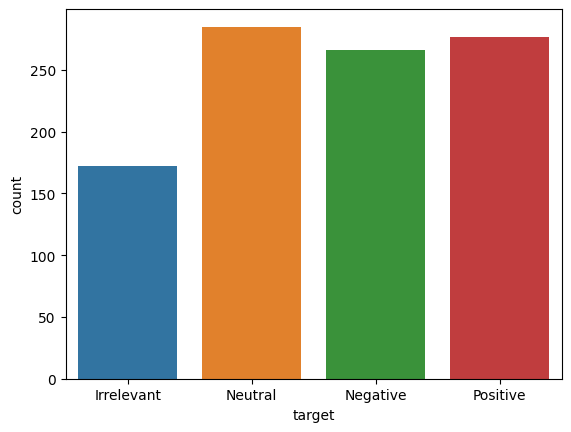

In [ ]:
sns.countplot(x = twitter_data['target'], data = twitter_data)

In [ ]:
twitter_data['social_media'].value_counts()

RedDeadRedemption(RDR)               40
johnson&johnson                      39
FIFA                                 38
PlayerUnknownsBattlegrounds(PUBG)    38
LeagueOfLegends                      37
ApexLegends                          36
TomClancysRainbowSix                 35
Nvidia                               35
GrandTheftAuto(GTA)                  35
Amazon                               34
Fortnite                             34
Facebook                             33
PlayStation5(PS5)                    33
AssassinsCreed                       33
Borderlands                          33
Overwatch                            32
Hearthstone                          32
Verizon                              32
CS-GO                                32
CallOfDuty                           31
Cyberpunk2077                        30
WorldOfCraft                         30
MaddenNFL                            29
Microsoft                            28
Dota2                                27


<Axes: xlabel='social_media', ylabel='count'>

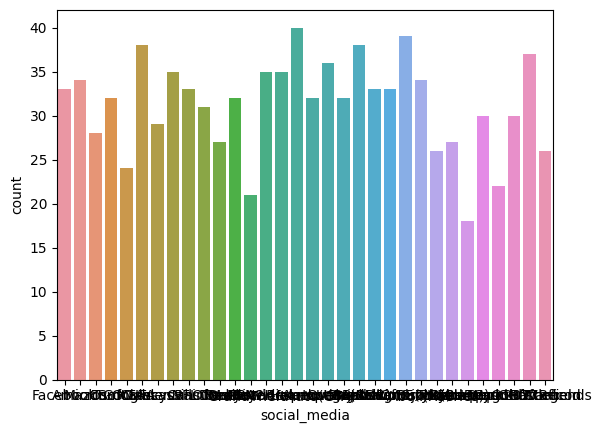

In [ ]:
sns.countplot(x = twitter_data['social_media'], data = twitter_data)

Remove irrelevent data

In [ ]:
twitter_data.drop(twitter_data.index[(twitter_data['target'] == 'Irrelevant')], axis = 0, inplace = True)
twitter_data

,id,social_media,target,text
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
5,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...,...,...
993,314,Amazon,Negative,Please explain how this is possible! How can t...
994,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


Reset index value

In [ ]:
twitter_data.reset_index(drop=True, inplace = True)
twitter_data

,id,social_media,target,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...,...,...
823,314,Amazon,Negative,Please explain how this is possible! How can t...
824,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
825,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
826,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


We only need tager and review, So Remove social media and id

In [ ]:
twitter_data.drop(['id','social_media'], axis = 1, inplace = True)
twitter_data

,target,text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,Negative,Please explain how this is possible! How can t...
824,Positive,Good on Sony. As much as I want to see the new...
825,Positive,Today sucked so itâs time to drink wine n pl...
826,Positive,Bought a fraction of Microsoft today. Small wins.


***Preprocessing***
---
  - converting to numerical
  

In [ ]:
twitter_data['target'] = twitter_data['target'].map({'Positive':1,'Negative': -1,'Neutral':0})
twitter_data

,target,text
0,0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,-1,@Microsoft Why do I pay for WORD when it funct...
2,-1,"CSGO matchmaking is so full of closet hacking,..."
3,0,Now the President is slapping Americans in the...
4,-1,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,-1,Please explain how this is possible! How can t...
824,1,Good on Sony. As much as I want to see the new...
825,1,Today sucked so itâs time to drink wine n pl...
826,1,Bought a fraction of Microsoft today. Small wins.


***Applying NLP on text***
---

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

Assigning txt to variable

In [ ]:
tweets = twitter_data.text
tweets

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking,...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâve had Madeleine McCann in my c...
                             ...                        
823    Please explain how this is possible! How can t...
824    Good on Sony. As much as I want to see the new...
825    Today sucked so itâs time to drink wine n pl...
826    Bought a fraction of Microsoft today. Small wins.
827    Johnson & Johnson to stop selling talc baby po...
Name: text, Length: 828, dtype: object

***Tokenization***
---

Another method for tokenization `TweetTokenizer`

In [ ]:
from nltk import TweetTokenizer
tk = TweetTokenizer()
tweets = tweets.apply(lambda x:tk.tokenize(x)).apply(lambda x:"".join(x))
# Apply is a keyword and this should be pass in every functional programming
# The second apply is given to remove all ' ', and give space instead this shold be pass in every code
tweets

0      BBCNews-AmazonbossJeffBezosrejectsclaimscompan...
1      @MicrosoftWhydoIpayforWORDwhenitfunctionssopoo...
2      CSGOmatchmakingissofullofclosethacking,it'satr...
3      NowthePresidentisslappingAmericansinthefacetha...
4      Hi@EAHelpIâvehadMadeleineMcCanninmycellarfor...
                             ...                        
823    Pleaseexplainhowthisispossible!Howcantheyletco...
824    GoodonSony.AsmuchasIwanttoseethenewPS5,what'sg...
825    Todaysuckedsoitâstimetodrinkwinenplayborderl...
826           BoughtafractionofMicrosofttoday.Smallwins.
827    Johnson&JohnsontostopsellingtalcbabypowderinU....
Name: text, Length: 828, dtype: object

- Remove special chareacters
  - For that we use regular expression (re)

In [ ]:
tweets = tweets.str.replace('[^a-zA-Z0-9]+',' ')
# + are used to remove leading special characters like @#$!
tweets

<ipython-input-17-4f5634e0e1be>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets = tweets.str.replace('[^a-zA-Z0-9]+',' ')


0      BBCNews AmazonbossJeffBezosrejectsclaimscompan...
1       MicrosoftWhydoIpayforWORDwhenitfunctionssopoo...
2      CSGOmatchmakingissofullofclosethacking it satr...
3      NowthePresidentisslappingAmericansinthefacetha...
4      Hi EAHelpI vehadMadeleineMcCanninmycellarforth...
                             ...                        
823    Pleaseexplainhowthisispossible Howcantheyletco...
824    GoodonSony AsmuchasIwanttoseethenewPS5 what sg...
825    Todaysuckedsoit stimetodrinkwinenplayborderlan...
826           BoughtafractionofMicrosofttoday Smallwins 
827    Johnson JohnsontostopsellingtalcbabypowderinU ...
Name: text, Length: 828, dtype: object

Example :

In [ ]:
#not in the project just for understanding
#demo
str1='Wonderful peacock@123 &!$#'
str2=re.sub('[^a-zA-Z0-9]+',' ',str1)
str2
# {"type":"string"}
#some words which are not stop word like ab wh which doesnt not have
#meaning are removed

'Wonderful peacock 123 '

some words which are not stop word like ab wh which doesnt not have meaning are removed

In [ ]:
from nltk.tokenize import word_tokenize
tweets = tweets.apply(lambda x:' '.join([w for w in word_tokenize(x) if len(w)>=3]))
tweets

0      BBCNews AmazonbossJeffBezosrejectsclaimscompan...
1      MicrosoftWhydoIpayforWORDwhenitfunctionssopoor...
2      CSGOmatchmakingissofullofclosethacking satruly...
3      NowthePresidentisslappingAmericansinthefacetha...
4      EAHelpI vehadMadeleineMcCanninmycellarforthepa...
                             ...                        
823    Pleaseexplainhowthisispossible Howcantheyletco...
824    GoodonSony AsmuchasIwanttoseethenewPS5 what sg...
825    Todaysuckedsoit stimetodrinkwinenplayborderlan...
826            BoughtafractionofMicrosofttoday Smallwins
827    Johnson JohnsontostopsellingtalcbabypowderinU ...
Name: text, Length: 828, dtype: object

***Stemming***
---

In [ ]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')
tweets = tweets.apply(lambda x:[stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
tweets

0      bbcnew amazonbossjeffbezosrejectsclaimscompany...
1      microsoftwhydoipayforwordwhenitfunctionssopoor...
2      csgomatchmakingissofullofclosethack satrulyawf...
3      nowthepresidentisslappingamericansinthefacetha...
4      eahelpi vehadmadeleinemccanninmycellarforthepa...
                             ...                        
823    pleaseexplainhowthisisposs howcantheyletcompan...
824    goodonsoni asmuchasiwanttoseethenewp 5 what sg...
825    todaysuckedsoit stimetodrinkwinenplayborderlan...
826             boughtafractionofmicrosofttoday smallwin
827    johnson johnsontostopsellingtalcbabypowderinu ...
Name: text, Length: 828, dtype: object

- Removing stop words

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
tweets = tweets.apply(lambda x:[i for i in word_tokenize(x) if i not in stop]).apply(lambda x:' '.join(x))
tweets

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0      bbcnew amazonbossjeffbezosrejectsclaimscompany...
1      microsoftwhydoipayforwordwhenitfunctionssopoor...
2      csgomatchmakingissofullofclosethack satrulyawf...
3      nowthepresidentisslappingamericansinthefacetha...
4      eahelpi vehadmadeleinemccanninmycellarforthepa...
                             ...                        
823    pleaseexplainhowthisisposs howcantheyletcompan...
824    goodonsoni asmuchasiwanttoseethenewp 5 sgoingo...
825    todaysuckedsoit stimetodrinkwinenplayborderlan...
826             boughtafractionofmicrosofttoday smallwin
827    johnson johnsontostopsellingtalcbabypowderinu ...
Name: text, Length: 828, dtype: object

***Vectorization***
---

Converting text to numerical data

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
train_data = vec.fit_transform(tweets)
print(train_data)
#0==> index il 691 value is 0.260

  (0, 905)	0.4225887957385005
  (0, 2252)	0.3565212814645605
  (0, 808)	0.3982052419644962
  (0, 1159)	0.4225887957385005
  (0, 626)	0.4225887957385005
  (0, 809)	0.4225887957385005
  (1, 2742)	0.7071067811865476
  (1, 2107)	0.7071067811865476
  (2, 2750)	0.7071067811865476
  (2, 1053)	0.7071067811865476
  (3, 114)	0.36197441232635946
  (3, 1015)	0.18513841879066437
  (3, 1341)	0.5548031974157192
  (3, 2309)	0.5548031974157192
  (3, 2252)	0.4680652892313941
  (4, 958)	0.38102694203947746
  (4, 3430)	0.359041524952572
  (4, 2093)	0.38102694203947746
  (4, 2846)	0.38102694203947746
  (4, 56)	0.38102694203947746
  (4, 3478)	0.38102694203947746
  (4, 1167)	0.38102694203947746
  (5, 377)	0.3037332774699114
  (5, 1499)	0.3037332774699114
  (5, 3428)	0.12135223357871262
  :	:
  (822, 1509)	0.7071067811865476
  (823, 479)	0.38899817027007944
  (823, 2170)	0.38899817027007944
  (823, 635)	0.38899817027007944
  (823, 2747)	0.38899817027007944
  (823, 1600)	0.38899817027007944
  (823, 2500)	0.388

seperating input and output labels

In [ ]:
# x= train_data in this .values not to be passed as it is already in array format
y=twitter_data['target'].values
y

array([ 0, -1, -1,  0, -1,  1,  1,  1, -1,  1,  1, -1,  0, -1,  1,  1, -1,
        1, -1, -1,  0, -1,  0,  0, -1, -1,  1,  1, -1,  1, -1,  0,  0,  1,
        0,  1,  0,  0,  0,  1,  0, -1, -1, -1,  0,  1, -1, -1,  1,  1,  1,
        1,  1, -1, -1,  1,  1, -1,  0, -1,  0, -1,  1, -1, -1,  1,  1,  1,
        0,  0,  0,  1,  1,  0,  1,  0, -1, -1,  0,  0, -1,  1, -1, -1, -1,
        0,  1,  0, -1,  1,  1,  0,  1,  0,  1, -1,  0,  0,  0, -1,  0, -1,
        0,  0,  1,  1,  0, -1, -1,  1, -1,  0, -1,  1,  0, -1,  0,  1,  0,
        1,  1,  0,  0,  0,  0,  1,  0,  1,  1, -1,  0,  0,  0,  0, -1,  0,
        1, -1,  0, -1,  0, -1, -1, -1,  1,  1,  1,  0,  0,  1,  0,  0,  0,
        1,  0, -1, -1,  0,  1,  1,  0,  1,  1,  0,  0, -1, -1, -1, -1,  1,
        0,  0,  1,  1,  1,  1, -1,  1,  1,  0, -1, -1, -1,  1,  1, -1, -1,
        1,  1, -1,  1,  1, -1,  1,  0, -1,  0,  0,  1, -1,  1,  1,  0,  1,
       -1, -1,  1,  1,  1,  1,  0,  0,  1, -1,  0,  1,  0, -1,  0,  0, -1,
        1,  1, -1,  0,  1

Seperating into train and test data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_data,y,test_size=
0.30,random_state=42)
x_train

<579x3770 sparse matrix of type '<class 'numpy.float64'>'
	with 3290 stored elements in Compressed Sparse Row format>

Model Creation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
knn=KNeighborsClassifier()
base=MultinomialNB()
model=SVC()
reg=LinearRegression()
tre=DecisionTreeRegressor()
lst=[knn,base,model]
lst1=[reg,tre]

Performance Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
for i in lst:
  print(i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print('*'*75)
  print(accuracy_score(y_test,y_pred))
  print('*'*75)
  print(confusion_matrix(y_test,y_pred))
  print('*'*75)
  print(classification_report(y_test,y_pred))

KNeighborsClassifier()
***************************************************************************
0.42168674698795183
***************************************************************************
[[ 6 20 53]
 [ 8 44 27]
 [ 4 32 55]]
***************************************************************************
              precision    recall  f1-score   support

          -1       0.33      0.08      0.12        79
           0       0.46      0.56      0.50        79
           1       0.41      0.60      0.49        91

    accuracy                           0.42       249
   macro avg       0.40      0.41      0.37       249
weighted avg       0.40      0.42      0.38       249

MultinomialNB()
***************************************************************************
0.3333333333333333
***************************************************************************
[[12 61  6]
 [ 8 64  7]
 [ 9 75  7]]
***************************************************************************
           

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error,r2_score
for i in lst1:
  print(i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print('*'*75)
  print(mean_absolute_percentage_error(y_test,y_pred))
  print('*'*75)
  print(r2_score(y_test,y_pred))

LinearRegression()
***************************************************************************
153741772544402.5
***************************************************************************
0.04257149842871
DecisionTreeRegressor()
***************************************************************************
868163783589493.8
***************************************************************************
-1.0658512302659653
